In [1]:
import os 
dir_primary = 'F:/UrbanDataProject/land_surface_temperature/code/analysis'
# os.chdir('/home/tml/research/land_surface_temperature/code/analysis')
os.chdir(dir_primary)
from analysis import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
code_dir = os.getcwd()
os.chdir('../..')


# Import data

In [2]:
cities = ['bal', 'por', 'det', 'phx']
# import data
grid_size = 500
df = import_data(grid_size)

# Train on three cities, test on the fourth

In [3]:
loss = regression_cityholdouts(df, cities)

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision tim

In [6]:
loss.head()

,error,error_metric,hold_num,model,time_of_day
0,0.000000,r2,hold-bal,null,diurnal
1,3.657049,mae,hold-bal,null,diurnal
2,1.499428,mae,hold-bal,null,nocturnal
3,0.000000,r2,hold-bal,null,nocturnal
4,0.621312,r2,hold-bal,gbrf,diurnal


In [ ]:
plot_holdout_points(loss, grid_size)

# Cross-validation over all data

In [3]:
# number of holdouts
sim_num = 50

In [4]:
regressions(df, cities, sim_num, grid_size, do_par = True)

In [3]:
# import data
path = 'data/regression/holdout_{}'.format(grid_size)                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
loss = pd.concat(df_from_each_file, ignore_index=True)

In [7]:
loss = loss.dropna()

In [15]:
loss.head()

,Unnamed: 0,error,error_metric,hold_num,model,time_of_day
4,4,0.913794,r2,0,gbrf,diurnal
5,5,0.994820,mae,0,gbrf,diurnal
6,6,0.685730,mae,0,gbrf,nocturnal
7,7,0.883297,r2,0,gbrf,nocturnal
8,8,0.911657,r2,0,mlr,diurnal


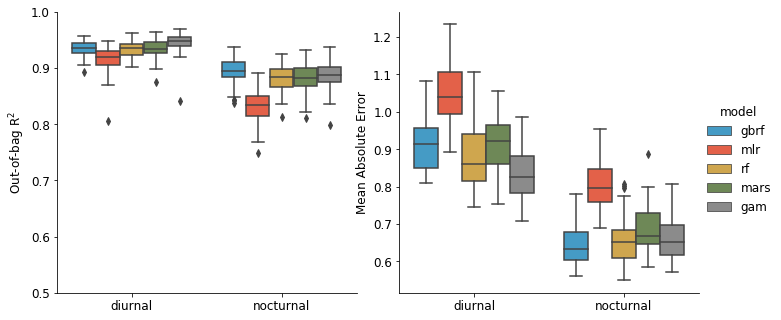

In [19]:
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]
sns.set_palette(five_thirty_eight)
mpl.rcParams.update({'font.size': 12})
g = sns.catplot(y="error", x="time_of_day", hue="model", col = "error_metric", data=loss, sharey = False, kind="box")
g.set_titles('')
for i, ax in enumerate(g.axes.flat): # set every-other axis for testing purposes
    if i%2==1:
#         ax.set_ylim(0,5)
        ax.set_ylabel('Mean Absolute Error')
        ax.set_xlabel('')
    elif i%2==0:
        ax.set_ylim(0.5,1)
        ax.set_ylabel('Out-of-bag R$^2$')
        ax.set_xlabel('')

In [9]:
plot_holdouts(sim_num, grid_size)

FileNotFoundError: File b'data/regression/holdout_results_500.csv' does not exist